In [4]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("continentes_sin_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
Media
Mediana
Desviación estándar
Mínimo
Máximo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             195 non-null    object 
 1   density                             195 non-null    float64
 2   abbreviation                        195 non-null    object 
 3   agriculturalland                    195 non-null    float64
 4   capital/majorcity                   195 non-null    object 
 5   currency-code                       195 non-null    object 
 6   forestedarea                        195 non-null    float64
 7   grossprimaryeducationenrollment     195 non-null    float64
 8   largestcity                         195 non-null    object 
 9   officiallanguage                    195 non-null    object 
 10  populationlaborforceparticipation   195 non-null    float64
 11  taxrevenue                          195 non-n

In [7]:
#variables_numeros = df[df.columns].select_dtypes(include = "float64")
#variables_numeros.columns

Index(['density', 'agriculturalland', 'forestedarea',
       'grossprimaryeducationenrollment', 'populationlaborforceparticipation',
       'taxrevenue', 'latitude', 'longitude', 'gasolineprice_i',
       'lifeexpectancy_i', 'landarea_k', 'armedforcessize_k', 'birthrate_k',
       'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k',
       'fertilityrate_k', 'gdp_k', 'grosstertiaryeducationenrollment_k',
       'infantmortality_k', 'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [6]:
variables_numeros = df.select_dtypes(include='float64')

estadisticas_descriptivas = variables_numeros.agg(['mean', 'median', 'std', 'min', 'max'])

estadisticas_descriptivas

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
mean,356.764103,39.134872,32.014872,102.473077,62.710000,16.537436,19.092351,20.232434,1.006369,72.381571,6.896244e+05,1.411286e+05,20.275790,360.546392,1.723727e+05,186.989164,6.626474,2.714996,4.748571e+11,37.060428,21.491245,163.787653,2.152555,32.486960,3.938116e+07,41.061141,6.994576,2.186941e+07
median,89.000000,39.600000,32.000000,102.550000,62.450000,16.300000,17.273849,20.972652,0.990000,73.200000,1.205380e+05,2.400000e+04,18.180000,256.000000,1.090200e+04,127.630000,2.500000,2.270000,3.438723e+10,28.100000,14.600000,65.000000,1.234000,30.900000,8.877067e+06,37.500000,5.650000,4.418218e+06
std,1982.888967,21.386637,23.358162,12.912165,9.975707,6.479029,23.961779,66.716110,0.350133,7.385777,1.916650e+06,3.597789e+05,9.873024,322.402259,8.240844e+05,380.364538,23.441717,1.268063,2.161216e+12,28.718024,19.392911,229.154387,2.677302,18.962274,1.447180e+08,20.049304,4.871460,7.451338e+07
min,2.000000,0.600000,0.000000,23.400000,38.000000,0.000000,-40.900557,-175.198242,0.000000,52.800000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,4.727146e+07,0.800000,1.400000,2.000000,0.010000,0.200000,8.360000e+02,8.000000,0.090000,5.464000e+03
max,26337.000000,82.600000,98.300000,142.500000,86.800000,37.200000,64.963051,178.065032,2.000000,85.400000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,2.142770e+13,136.600000,84.500000,1150.000000,13.590000,81.600000,1.397715e+09,219.600000,28.180000,8.429340e+08


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [29]:
max = df.groupby("density")["country"].max().tail(1)
max

density
26337.0    Monaco
Name: country, dtype: object

In [32]:
min = df.groupby("population_k")["country"].min().head(1)
min

population_k
836.0    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [39]:
media = df.groupby("country")["birthrate_k"].mean()
media

country
Afghanistan    32.49
Albania        11.78
Algeria        24.28
Andorra         7.20
Angola         40.73
               ...  
Venezuela      17.88
Vietnam        16.75
Yemen          30.45
Zambia         36.19
Zimbabwe       30.68
Name: birthrate_k, Length: 195, dtype: float64

In [42]:
df["birthrate_k"].mean()

20.275789607922935

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

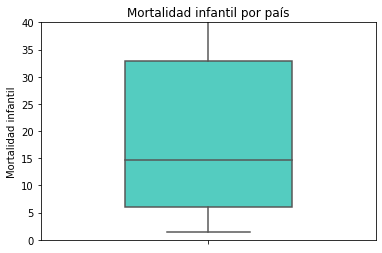

In [50]:
sns.boxplot(y = "infantmortality_k", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            )
plt.title("Mortalidad infantil por país")
plt.ylabel("Mortalidad infantil");

# cambiamos el límite del eje y
plt.ylim([0, 40]);

In [12]:

#6, 15 33

df['infantmortality_k'].describe()

limite_bajo = 6
limite_alto = 15

def categoria_mortalidad(numero):
    if numero < limite_bajo:
        return 'Baja'
    elif limite_bajo <= numero < limite_alto:
        return 'Moderada'
    else:
        return 'Alta'
    
df['categoria_mortalidad'] = df['infantmortality_k'].apply(categoria_mortalidad)

print(df[['country', 'infantmortality_k', 'categoria_mortalidad']])


         country  infantmortality_k categoria_mortalidad
0    Afghanistan               47.9                 Alta
1        Albania                7.8             Moderada
2        Algeria               20.1                 Alta
3        Andorra                2.7                 Baja
4         Angola               51.6                 Alta
..           ...                ...                  ...
190    Venezuela               21.4                 Alta
191      Vietnam               16.5                 Alta
192        Yemen               42.9                 Alta
193       Zambia               40.4                 Alta
194     Zimbabwe               33.9                 Alta

[195 rows x 3 columns]


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación.

In [14]:
df_correlacion = df[['fertilityrate_k', 'lifeexpectancy_i']]
df_correlacion.sample(5)

,fertilityrate_k,lifeexpectancy_i
62,5.22,61.7
115,1.75,76.8
79,2.14,76.5
37,1.81,77.1
175,4.32,60.8


In [15]:
df_correlacion_2 = df_correlacion.corr( method='spearman')
df_correlacion_2

,fertilityrate_k,lifeexpectancy_i
fertilityrate_k,1.000000,-0.830914
lifeexpectancy_i,-0.830914,1.000000


6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

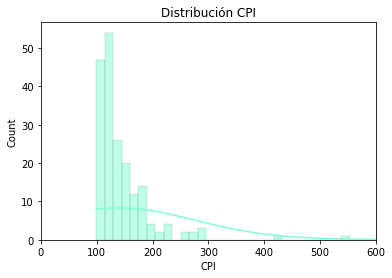

In [18]:
sns.histplot( x='cpi_k', 
             data=df, 
             kde=True,
             color='aquamarine')

plt.xlabel('CPI')

plt.title('Distribución CPI')

plt.xlim(0,600);

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [22]:
df.sample(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k,categoria_mortalidad
70,Guinea-Bissau,70.0,GW,58.0,Bissau,XOF,69.8,118.7,Bissau,Portuguese,72.0,10.3,11.803749,-15.180413,Asia,1.020914,58.0,36125.0,4000.0,35.13,245.0,293.0,111.65,1.4,4.48,1.340389e+09,2.6,54.0,667.0,0.160,37.2,1920922.0,45.5,2.47,840922.0,Alta
184,United Arab Emirates,118.0,AE,5.5,Abu Dhabi,AED,4.6,108.4,Dubai,Arabic,82.1,0.1,23.424076,53.847818,Asia,0.490000,77.8,83600.0,63000.0,10.33,971.0,206324.0,114.52,-1.9,1.41,4.211423e+11,36.8,6.5,3.0,4.768,17.8,9770529.0,15.9,2.35,8479744.0,Moderada
69,Guinea,53.0,GN,59.0,Conakry,GNF,25.8,91.5,Kankan,French,61.5,10.8,9.945587,-9.696645,Asia,0.900000,61.2,245857.0,13000.0,36.36,224.0,2996.0,262.95,9.5,4.70,1.359028e+10,11.6,64.9,576.0,0.438,54.5,12771246.0,69.3,4.30,4661505.0,Alta
87,Kazakhstan,7.0,KZ,80.4,Astana,KZT,1.2,104.4,Almaty,Russian,68.8,11.7,48.019573,66.923684,Asia,0.420000,73.2,2724900.0,71000.0,21.77,7.0,247207.0,182.75,5.2,2.84,1.801617e+11,61.7,8.8,10.0,0.410,38.8,18513930.0,28.4,4.59,10652915.0,Moderada
78,Indonesia,151.0,ID,31.5,Jakarta,IDR,49.9,106.4,Kalimantan,Indonesian,67.5,10.2,-0.789275,113.921327,Asia,0.630000,71.5,1904569.0,676000.0,18.07,62.0,563325.0,151.18,3.0,2.31,1.119191e+12,36.3,21.1,177.0,0.480,48.3,270203917.0,30.1,4.69,151509724.0,Alta


In [23]:
df["diferencia"] = df["gdp_k"] - df["co2-emissions_k"]

In [32]:
diferencia = df.sort_values("diferencia", ascending = False)
diferencia.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k,categoria_mortalidad,diferencia
186,United States,36.0,US,44.4,"Washington, D.C.",USD,33.9,101.8,New York City,Unknown,62.0,9.6,37.090240,-95.712891,America,0.71,78.5,9833517.0,1359000.0,11.6,1.0,5006302.0,117.24,7.5,1.73,2.142770e+13,88.2,5.6,19.0,7.25,11.1,3.282395e+08,36.6,14.70,270663028.0,Baja,2.142769e+13
36,China,153.0,CN,56.2,Beijing,CNY,22.4,100.2,Shanghai,Standard Chinese,68.0,9.4,35.861660,104.195397,Asia,0.96,77.0,9596960.0,2695000.0,10.9,86.0,9893038.0,125.08,2.9,1.69,1.991000e+13,50.6,7.4,29.0,0.87,32.4,1.397715e+09,59.2,4.32,842933962.0,Moderada,1.990999e+13
85,Japan,347.0,JP,12.3,Tokyo,Unknown,68.5,98.8,Tokyo,Unknown,61.7,11.9,36.204824,138.252924,Asia,1.06,84.2,377944.0,261000.0,7.4,81.0,1135886.0,105.48,0.5,1.42,5.081770e+12,63.2,1.8,5.0,6.77,13.1,1.262266e+08,46.7,2.29,115782416.0,Baja,5.081768e+12
64,Germany,240.0,DE,47.7,Berlin,EUR,32.7,104.0,Berlin,German,60.8,11.5,51.165691,10.451526,Europa,1.39,80.9,357022.0,180000.0,9.5,49.0,727973.0,112.85,1.4,1.56,3.845630e+12,70.2,3.1,7.0,9.99,12.5,8.313280e+07,48.8,3.04,64324835.0,Baja,3.845629e+12
185,United Kingdom,281.0,GB,71.7,London,GBP,13.1,101.2,London,English,62.8,25.5,55.378051,-3.435973,Europa,1.46,81.3,243610.0,148000.0,11.0,44.0,379025.0,119.62,1.7,1.68,2.827113e+12,60.0,3.6,7.0,10.13,14.8,6.683440e+07,30.6,3.85,55908316.0,Baja,2.827113e+12


In [34]:
pais_diferencia = diferencia.iloc[0] 
pais_diferencia["country"]

'United States'


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [31]:
promedio = df.groupby('country')['populationlaborforceparticipation'].mean().reset_index()
promedio

,country,populationlaborforceparticipation
0,Afghanistan,48.90
1,Albania,55.70
2,Algeria,41.20
3,Andorra,62.45
4,Angola,77.50
...,...,...
190,Venezuela,59.70
191,Vietnam,77.40
192,Yemen,38.00
193,Zambia,74.60


9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [35]:
var_numericas = df.select_dtypes(include=['int64','float64']).columns
var_numericas

Index(['density', 'agriculturalland', 'forestedarea',
       'grossprimaryeducationenrollment', 'populationlaborforceparticipation',
       'taxrevenue', 'latitude', 'longitude', 'gasolineprice_i',
       'lifeexpectancy_i', 'landarea_k', 'armedforcessize_k', 'birthrate_k',
       'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k',
       'fertilityrate_k', 'gdp_k', 'grosstertiaryeducationenrollment_k',
       'infantmortality_k', 'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k', 'diferencia'],
      dtype='object')

In [36]:
df_numericas = df[var_numericas]
df_numericas

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k,diferencia
0,60.0,58.1,2.1,104.0,48.90,9.3,33.939110,67.709953,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.430,78.4,38041754.0,71.40,11.120,9797273.0,1.910135e+10
1,105.0,43.1,28.1,107.0,55.70,18.6,41.153332,20.168331,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.120,56.9,2854191.0,36.60,12.330,1747593.0,1.527807e+10
2,18.0,17.4,0.8,109.9,41.20,37.2,28.033886,1.659626,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.950,28.1,43053054.0,66.10,11.700,31510100.0,1.699881e+11
3,164.0,40.0,34.0,106.4,62.45,16.3,42.506285,1.521801,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.630,36.4,77142.0,34.84,8.058,67873.0,3.154058e+09
4,26.0,47.5,46.3,113.5,77.50,9.2,-11.202692,17.873887,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.710,33.4,31825295.0,49.10,6.890,21061025.0,9.463538e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,52.7,97.2,59.70,16.3,6.423750,-66.589730,0.00,72.100000,912050.0,343000.0,17.88,58.0,164175.0,2740.270,254.90,2.27,4.823593e+11,79.30,21.4,125.0,0.010,45.8,28515829.0,73.30,8.800,25162368.0,4.823592e+11
191,314.0,39.3,48.1,110.6,77.40,19.1,14.058324,108.277199,0.80,75.300000,331210.0,522000.0,16.75,84.0,192668.0,163.520,2.80,2.05,2.619212e+11,28.50,16.5,43.0,0.730,43.5,96462106.0,37.60,2.010,35332140.0,2.619211e+11
192,56.0,44.6,1.0,93.6,38.00,16.3,15.552727,48.516388,0.92,66.100000,527968.0,40000.0,30.45,967.0,10609.0,157.580,8.10,3.79,2.691440e+10,10.20,42.9,164.0,1.046,81.0,29161922.0,26.60,12.910,10869523.0,2.691439e+10
193,25.0,32.1,65.2,98.7,74.60,16.2,-13.133897,27.849332,1.40,63.500000,752618.0,16000.0,36.19,260.0,5141.0,212.310,9.20,4.63,2.306472e+10,4.10,40.4,213.0,0.240,27.5,17861030.0,15.60,11.430,7871713.0,2.306472e+10


In [38]:
df_correlaciones = df_numericas.corr(method = "spearman")
df_correlaciones

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k,diferencia
density,1.000000,0.147372,-0.115015,0.027640,-0.058024,0.056559,0.138095,0.080083,0.180973,0.221950,-0.565343,-0.020767,-0.256306,-0.022783,-0.043051,-0.170176,-0.156894,-0.228503,-0.008190,0.029261,-0.165066,-0.101719,0.137549,-0.005655,-0.075104,-0.022050,-0.141862,-0.073236,-0.008190
agriculturalland,0.147372,1.000000,-0.384844,-0.062459,-0.157066,-0.057405,0.006076,-0.011380,0.015689,-0.216871,0.144010,0.190696,0.172422,-0.043580,0.083079,0.241240,0.259923,0.164872,0.079967,-0.129145,0.193146,0.132890,-0.185435,0.100546,0.269866,0.162726,0.045211,0.228850,0.079967
forestedarea,-0.115015,-0.384844,1.000000,0.112982,0.149352,0.072990,-0.173032,-0.082101,0.167421,-0.004018,-0.135926,-0.187371,-0.079720,-0.080402,-0.174387,-0.089244,-0.048283,-0.067728,-0.128961,0.002349,-0.035630,0.034793,0.060075,-0.180689,-0.184431,0.093627,-0.045482,-0.182427,-0.128961
grossprimaryeducationenrollment,0.027640,-0.062459,0.112982,1.000000,0.155443,0.035478,-0.195158,-0.079723,-0.054167,-0.026138,0.000042,-0.036589,0.057557,-0.066401,-0.046288,0.086976,-0.001468,0.043352,-0.052076,-0.067313,0.064374,0.105882,-0.053737,-0.102878,0.030942,-0.011903,-0.064270,0.011443,-0.052076
populationlaborforceparticipation,-0.058024,-0.157066,0.149352,0.155443,1.000000,-0.120244,-0.307536,0.072858,-0.075336,-0.142062,-0.011295,-0.077567,0.200143,0.076421,-0.164889,0.024117,-0.051757,0.178254,-0.117851,-0.183814,0.161145,0.228409,-0.172723,-0.116571,-0.027023,-0.102699,-0.460790,-0.081336,-0.117851
taxrevenue,0.056559,-0.057405,0.072990,0.035478,-0.120244,1.000000,0.115244,-0.120588,0.368778,0.346354,-0.393475,-0.328650,-0.367577,0.020763,-0.194524,-0.301942,-0.211942,-0.366449,-0.179818,0.287551,-0.362396,-0.346670,0.332423,-0.312266,-0.436614,-0.157146,0.213284,-0.395600,-0.179818
latitude,0.138095,0.006076,-0.173032,-0.195158,-0.307536,0.115244,1.000000,-0.024289,0.166253,0.518105,-0.049150,0.204037,-0.587441,-0.040948,0.365426,-0.242736,-0.106603,-0.560722,0.354581,0.490863,-0.580923,-0.574853,0.308676,0.090876,0.050126,-0.016408,0.018800,0.134022,0.354581
longitude,0.080083,-0.011380,-0.082101,-0.079723,0.072858,-0.120588,-0.024289,1.000000,-0.160741,-0.129266,0.059005,0.199192,0.057911,0.304712,0.117841,0.152323,0.057994,0.051801,0.039517,-0.051270,0.071319,-0.036512,-0.098010,0.020869,0.119498,-0.177428,-0.179384,0.065029,0.039517
gasolineprice_i,0.180973,0.015689,0.167421,-0.054167,-0.075336,0.368778,0.166253,-0.160741,1.000000,0.327588,-0.330897,-0.242734,-0.298627,-0.157827,-0.233526,-0.298733,-0.112963,-0.258210,-0.077740,0.122489,-0.304309,-0.191846,0.374952,-0.276335,-0.261803,0.028879,0.068603,-0.233503,-0.077740
lifeexpectancy_i,0.221950,-0.216871,-0.004018,-0.026138,-0.142062,0.346354,0.518105,-0.129266,0.327588,1.000000,-0.204568,0.152089,-0.855504,-0.141163,0.409191,-0.403815,-0.310666,-0.830914,0.473856,0.756714,-0.913592,-0.814475,0.672947,-0.325582,-0.079978,-0.160729,0.015716,0.076016,0.473856


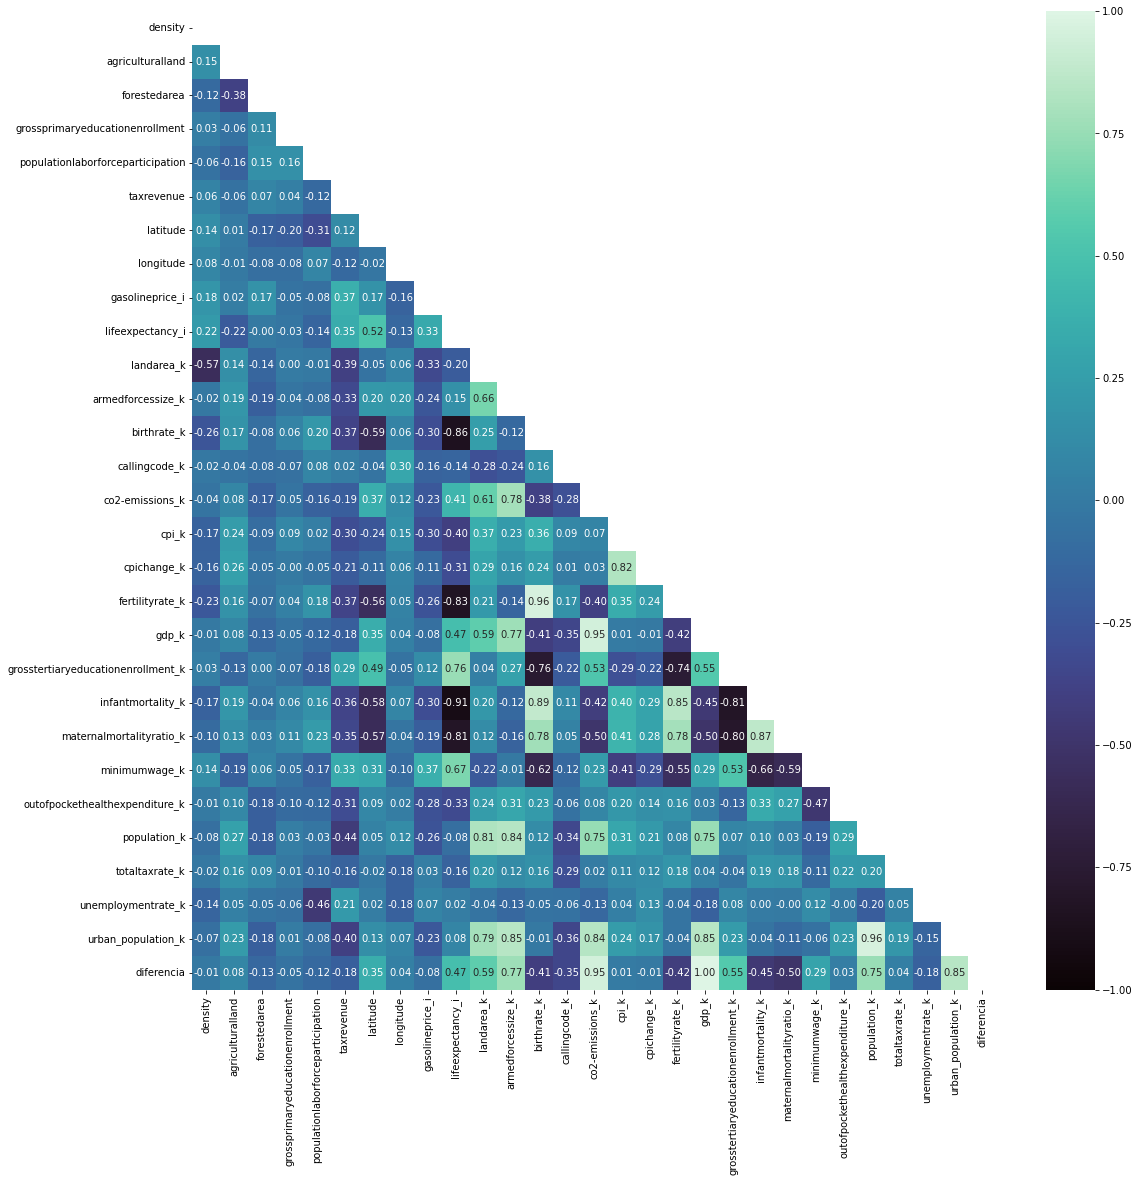

In [39]:
plt.figure(figsize = (18, 18))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 